<a href="https://colab.research.google.com/github/valeromora/Procesamiento_Digital_de_Se-ales_2024_2/blob/main/exercise2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install dsp-utils

In [73]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq
from scipy.signal import butter, filtfilt

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

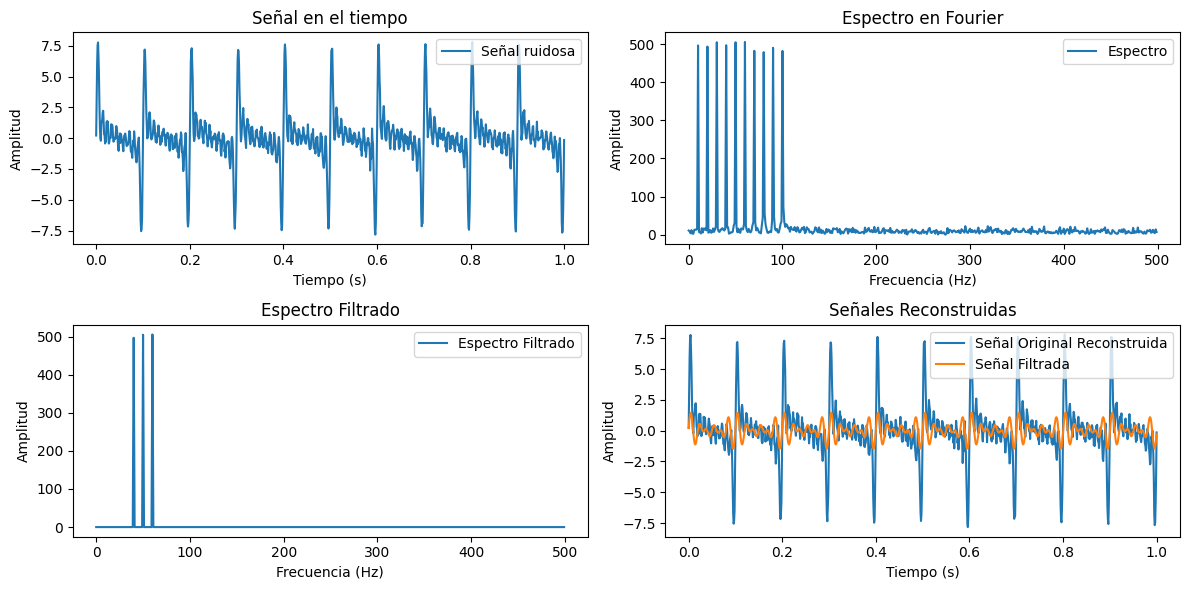

In [74]:
# parametros
fs = 1000
duration = 1
t = np.linspace(0, duration, int(fs * duration))

# sumatoria de senos
frequencies = np.arange(10, 110, 10)  # Frecuencias de los senos
signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Ruido blanco gaussiano
noise = np.random.normal(0, 0.3, len(t))
noisy_signal = signal + noise

# Espectro en Fourier
spectrum = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(t), d=1/fs)

# Filtrado
filtered_spectrum = np.zeros_like(spectrum)
# solo frecuencias 40, 50 y 60 Hz
for target_freq in [40, 50, 60]:
    idx = np.argmin(np.abs(freqs - target_freq))  # Encontrar índice más cercano
    filtered_spectrum[idx] = spectrum[idx]

# Transformadas inversas
original_signal_reconstructed = np.fft.ifft(spectrum).real
filtered_signal = np.fft.ifft(filtered_spectrum).real

# Espectro original
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, noisy_signal, label="Señal ruidosa")
plt.title("Señal en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(freqs[:len(freqs)//2], np.abs(spectrum[:len(freqs)//2]), label="Espectro")
plt.title("Espectro en Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()

# Mostrar el espectro filtrado
plt.subplot(2, 2, 3)
plt.plot(freqs[:len(freqs)//2], np.abs(filtered_spectrum[:len(freqs)//2]), label="Espectro Filtrado")
plt.title("Espectro Filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()

# Mostrar las señales reconstruidas
plt.subplot(2, 2, 4)
plt.plot(t, original_signal_reconstructed, label="Señal Original Reconstruida")
plt.plot(t, filtered_signal, label="Señal Filtrada")
plt.title("Señales Reconstruidas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()

plt.tight_layout()
plt.show()

#Equalizador

In [75]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

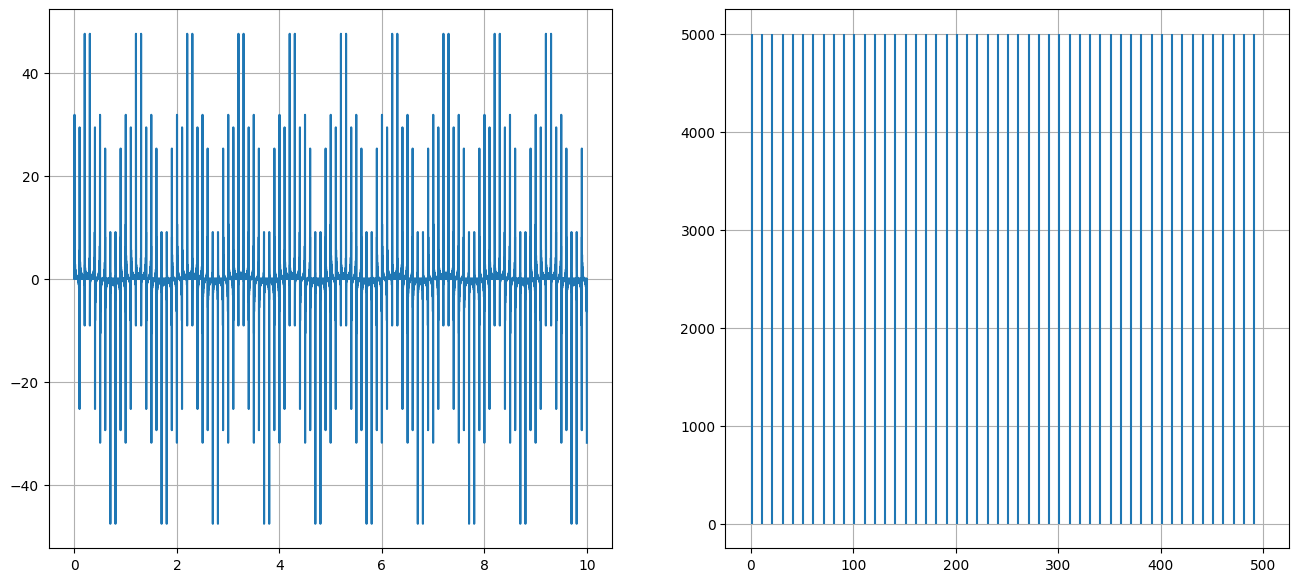

In [76]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

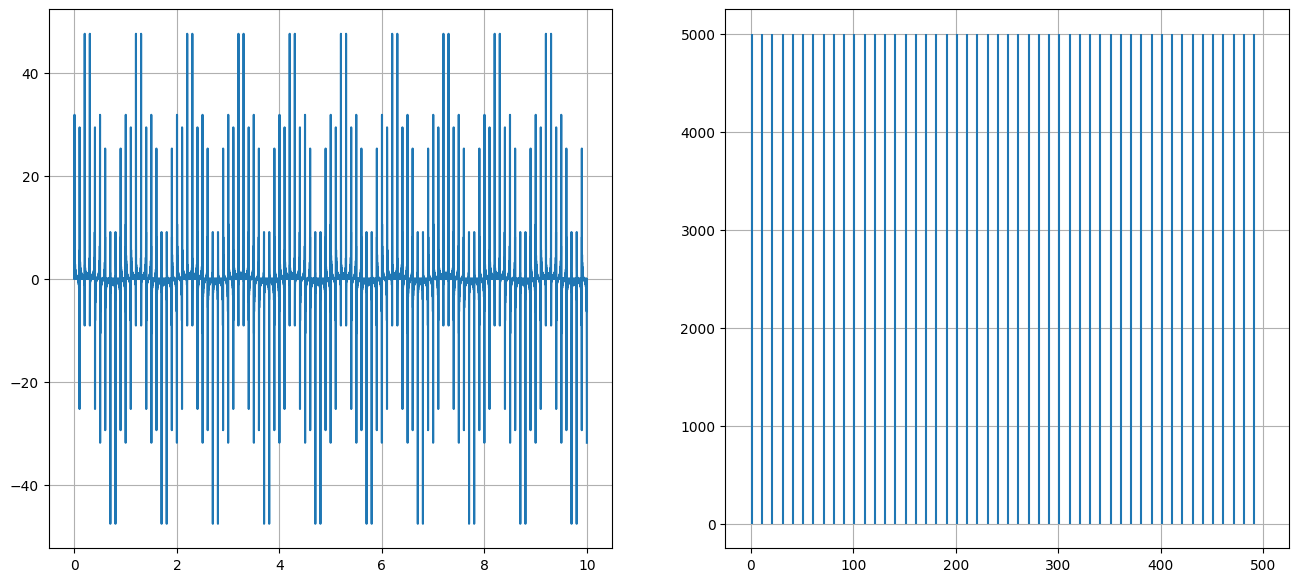

In [77]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, wb=10, gain=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

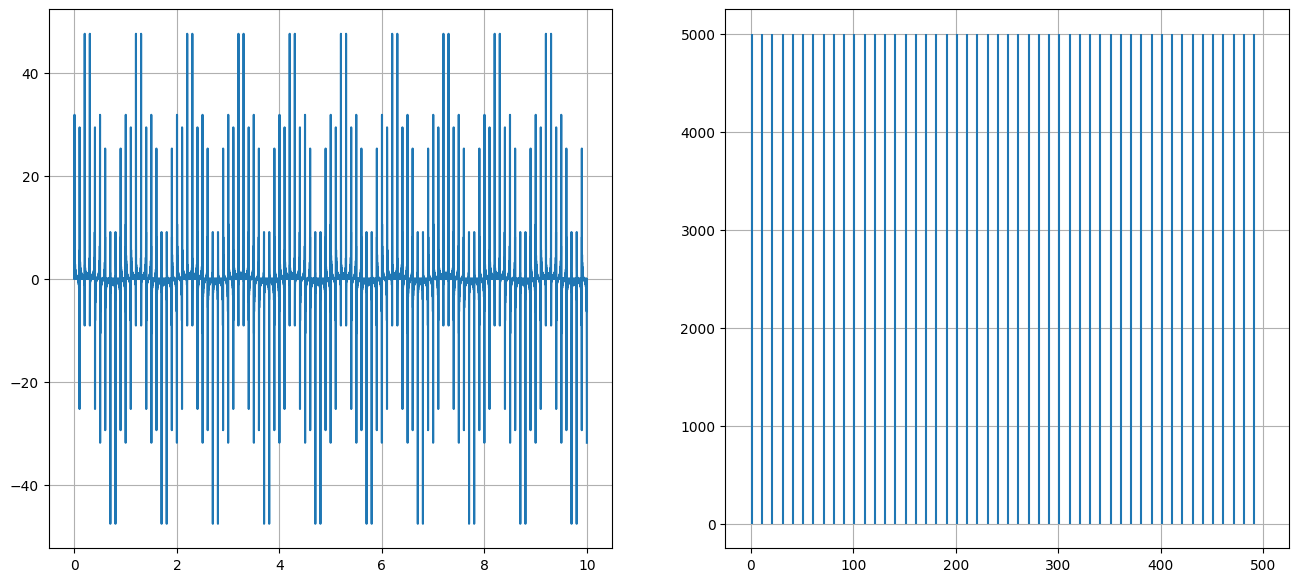

In [78]:
def n_band_equalizer(signal_n, fc_array, wb, gain_array):
  i = 0
  signal_eq = signal_n # Se copia la señal original
  for fc in fc_array: # Se recorre el arreglo de frecuencias a modificar
    s_filt = filter_(signal_n, fc-(wb/2), fc+(wb/2), fs) # Se usa el filtro para tomas cada banda y modificarla
    signal_eq = (signal_eq - s_filt) + (s_filt*np.power(10, (gain_array[i] / 20))) # Se agrega la banda modificada a la señal equalizada
    i += 1
  return signal_eq

# Ejemplo
fc_array = [50, 120, 200, 300, 400]
wb =  20
gain_array = [0, 0, 0, 0, 0]
signal_eq = n_band_equalizer(signal, fc_array, wb, gain_array)
vis.plot_dsp(signal_eq, sample_rate=1000, time=generador.time, ffn='vlines')

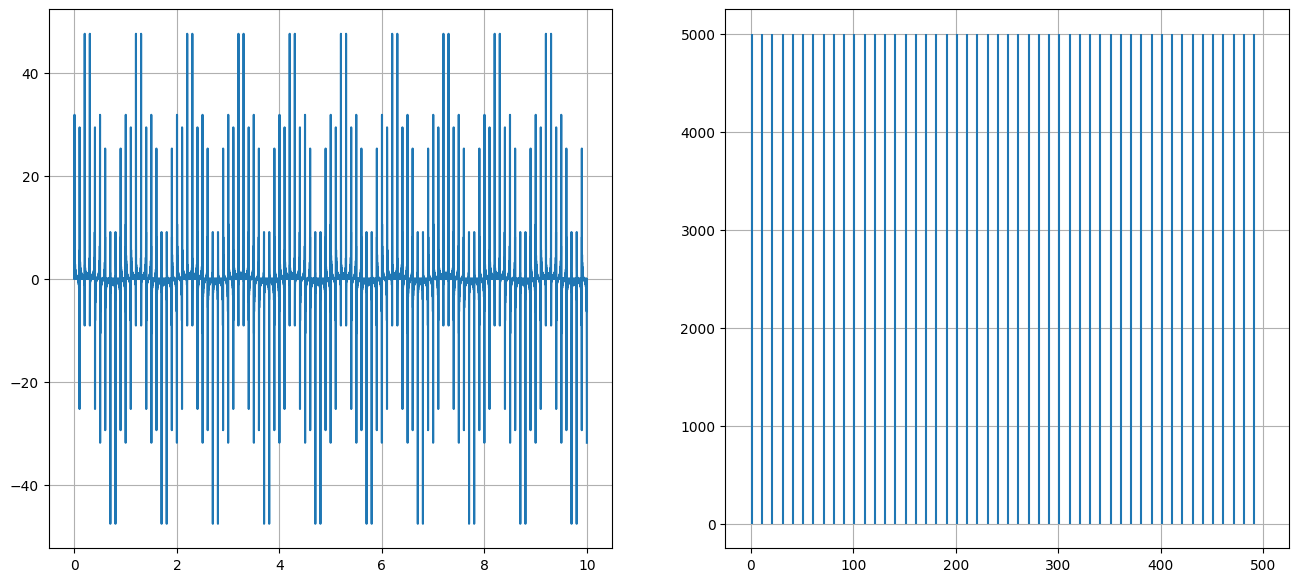

In [79]:
@interact(fc1=(20, 250, 10), wb1=(10, 100, 10), gain1=(-10, 10, 1),
          fc2=(250, 500, 10), wb2=(10, 100, 10), gain2=(-10, 10, 1),
          fc3=(500, 1000, 10), wb3=(10, 100, 10), gain3=(-10, 10, 1),
          fc4=(1000, 2000, 10), wb4=(10, 100, 10), gain4=(-10, 10, 1),
          fc5=(2000, 4000, 10), wb5=(10, 100, 10), gain5=(-10, 10, 1))
def visualize_equalized_signal(fc1, wb1, gain1, fc2, wb2, gain2, fc3, wb3, gain3, fc4, wb4, gain4, fc5, wb5, gain5):
    # Visualizar la señal equalizada
    vis.plot_dsp(signal_eq, sample_rate=fs, time=generador.time, ffn='vlines')
    plt.show()